In [148]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [149]:
# load the dataset and standardize the data
data = pd.read_csv('data.csv',index_col=0)

species_list = []
compteur = 0
for j in range(data.shape[1]):
    for i in range(len(data.index)):
        if(data.iloc[i,j]==0):
            species_list.append(data.columns[j]) # liste des espèces non observées durant une certaine ériode
            compteur += 1
            break #dès qu'un 0 est détecté, on passe à l'espèce suivante
        
data = data.drop(species_list, axis=1) # 12 mois d'observations et 12 espèces prises en compte

scaler = StandardScaler()
donnees_std = scaler.fit_transform(data)
data = pd.DataFrame(donnees_std, index=data.index, columns=data.columns)
data.head()

,Corneille noire,Geai des chênes,Grimpereau des jardins,Merle noir,Mésange bleue,Mésange charbonnière,Perruche à collier,Pie bavarde,Pigeon biset,Pigeon ramier,Rougegorge familier,Troglodyte mignon
Mois,,,,,,,,,,,,
janvier,1.278443,1.279754,-0.371391,1.002640,1.923357,2.720927,1.841892,1.980427,-0.916135,1.690437,1.217223,-0.026252
fevrier,-0.657840,0.612056,0.185695,-0.271303,-0.334497,0.309196,-1.180700,0.396085,-0.916135,-1.084432,-0.553283,-0.341279
mars,1.725278,-0.055641,1.856953,1.285739,1.923357,0.865749,1.464068,1.980427,2.532843,0.446531,0.110657,1.548882
avril,-0.955729,-0.055641,-0.928477,-0.412852,-0.334497,-0.618392,-0.236140,-1.188256,-0.485013,-0.893061,-1.659850,-0.026252
mai,-0.955729,-0.723339,0.742781,1.285739,-1.087115,-0.989428,0.141684,-0.282918,0.592793,-0.988746,0.553283,0.603801


7. Appliquez un ACP. Affichez les deux premières composantes principales sous forme
d’un nuage de points pour visualiser les résultats. Identifiez chaque mois par une
couleur différente, et ajoutez une légende. Ajoutez aussi sur les axes le pourcentage
de variance expliquée par chaque composante. Commentez.

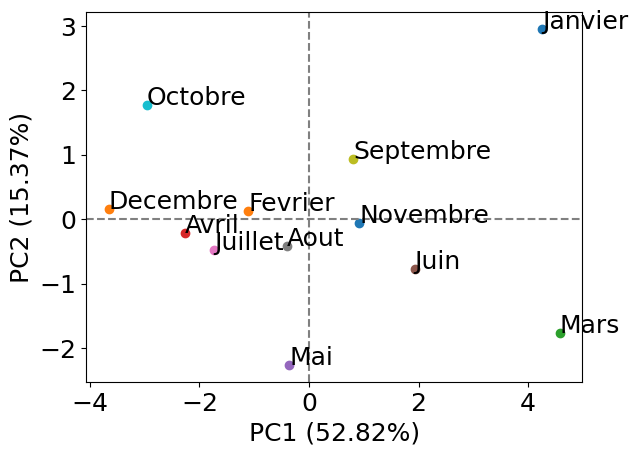

In [170]:
# Perform PCA on the standardized data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

# Plot the principal components with different colors for each month
fig, ax = plt.subplots()

labels = ['Janvier', 'Fevrier', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Aout', 'Septembre', 'Octobre', 'Novembre', 'Decembre']

for i, label in enumerate(labels):
    ax.scatter(principal_components[i, 0], principal_components[i, 1], label=label)
    ax.annotate(label, (principal_components[i, 0], principal_components[i, 1]))
    
# Add the percentage of variance explained by each component on the axes
variance_exp = pca.explained_variance_ratio_
ax.set_xlabel(f'PC1 ({variance_exp[0]*100:.2f}%)')
ax.set_ylabel(f'PC2 ({variance_exp[1]*100:.2f}%)')

ax.axhline(0, color='gray', linestyle='--')
ax.axvline(0, color='gray', linestyle='--')

8. Affichez la variance de chaque variable obtenue dans l’espace de l’ACP. Commentez.
Quelle est la définition de la variance expliquée ? Quelle est le lien avec les variances
que vous venez de calculer ?

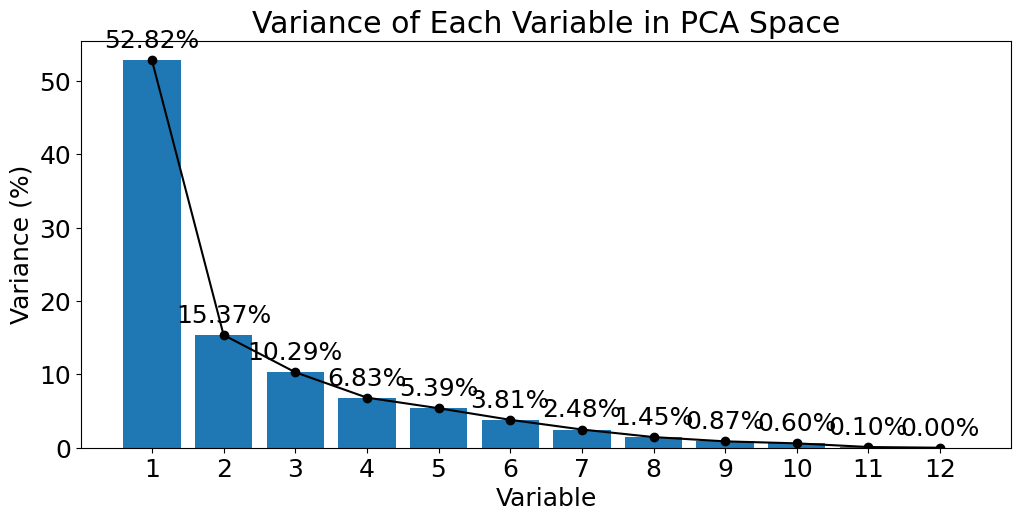

In [173]:
pca = PCA()
pca.fit(data)
variances = pca.explained_variance_ratio_ * 100

# Plot the variances
plt.figure(figsize=(len(variances),max(variances)/10))
plt.bar(range(1, len(variances)+1), variances)

# Add dots with percentage values on top of each bar
for i, var in enumerate(variances):
    plt.plot(i + 1, var, 'ko')
    plt.text(i + 1, var + 1, f'{var:.2f}%', ha='center', va='bottom')
    if i > 0:
        plt.plot([i, i + 1], [variances[i - 1], var], 'k')

plt.xticks(range(1, len(variances) + 1))
plt.xlabel('Variable')
plt.ylabel('Variance (%)')
plt.title('Variance of Each Variable in PCA Space')

plt.show()


9. Affichez et commentez le cercle de corrélation. Permet-il de retrouver les résultats
des questions 3 et 6 ?

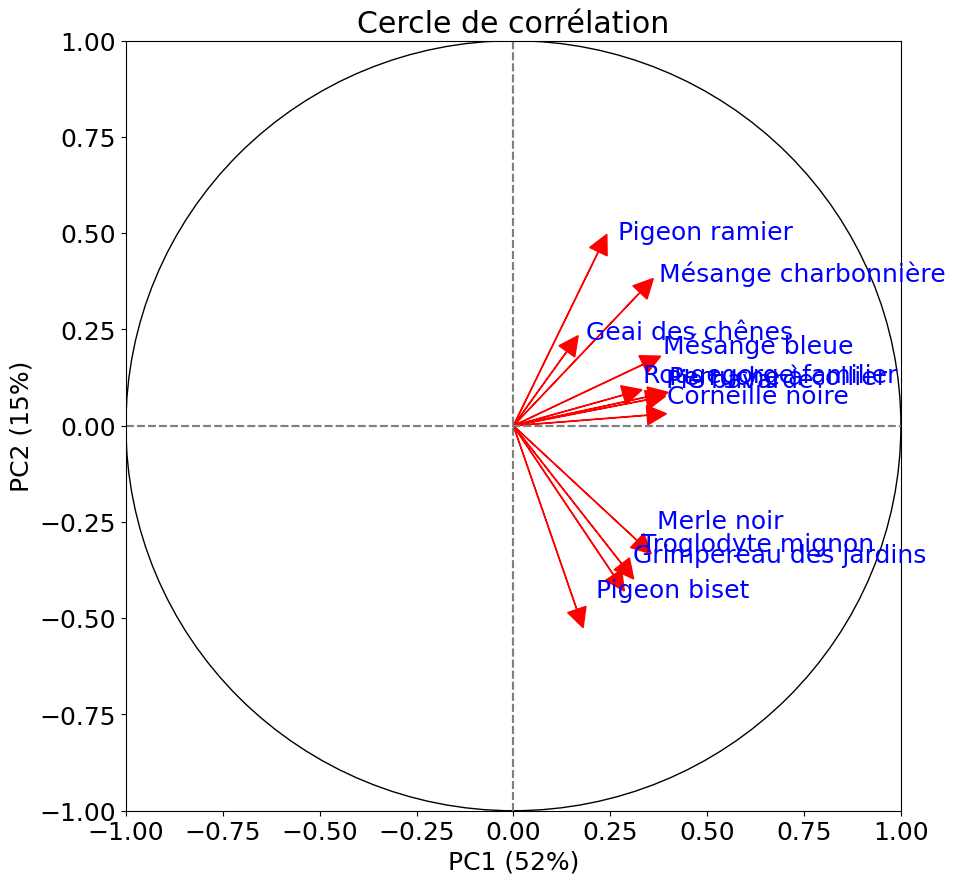

In [187]:
pca = PCA()
pca.fit(data)
pcs = pca.components_

fig, ax = plt.subplots(figsize=(10,10))

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axhline(0, color='gray', linestyle='--')
ax.axvline(0, color='gray', linestyle='--')
circle = plt.Circle((0, 0), radius=1, edgecolor='black', facecolor='none')

ax.add_patch(circle)
ax.axhline(0, color='gray', linestyle='--')
ax.axvline(0, color='gray', linestyle='--')
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc='r', ec='r')
    ax.text(x, y, data.columns[i], color='b', ha='left', va='center')


ax.set_xlabel("PC1 ({}%)".format(int(pca.explained_variance_ratio_[0] * 100)))
ax.set_ylabel("PC2 ({}%)".format(int(pca.explained_variance_ratio_[1] * 100)))
ax.set_title("Cercle de corrélation")

plt.show()
